# 3. Linear Models for Regression

## 3.1. Linear Basis Function Models

观测数据 : $\{ \mathbf{x_n}, n = 1,\ldots, N \}$，
目标变量 ：$\{t_n\}$

**1) 输入数据的线性组合**

  最简单的回归模型但是就是线性的模型，其中线性模型中最简单的是输入数据的线性组合模型：
  $$
      y\left(\mathbf{x},m \mathbf{w}\right) = w_0 + w_1 x_1+ \ldots+ w_D x_D;
  $$
  其中$\mathbf{x} =\left(x_1, \ldots, x_D\right)^T$, 上述模型通常被称为 linear regression; 上述模型是输入数据的线性函数，因此上述模型的描述能够较大受限。
  
**2) 基函数 Basis fucntions**
  考虑略微复杂的模型：
  $$
      y\left(\mathbf{x},m \mathbf{w}\right) = w_0 + \sum_{j=1}^{M-1}w_j\phi\left(\mathbf{x}\right)
  $$
  上述模型中参数的个数为 $M$， $w_0$ 表示和输入数据无关的参数，通常被称为 bias 参数。若令$\phi_0\left(\mathbf{x}\right) =1$ , 那么上述模型可以另外写为;
  
   $$
      y\left(\mathbf{x},m \mathbf{w}\right) =\sum_{j=0}^{M-1}w_j\phi\left(\mathbf{x}\right) = \mathbf{w}^T \mathbf{\phi\left(x\right)}
  $$
  其中 $\mathbf{w} =\left(w_0, w_1,\ldots, w_{M-1}\right)^T$, $\mathbf{\phi} = \left(\phi_0, \ldots, \phi_{M-1}\right)$. 一般地，我们也可以认为$\mathbf{\phi\left(x\right)}$ 是对原始数据进行特征提取之后的结果。
  
  采用了非线性的基函数之后，可以认为模型是输入数据的非线性函数。但由于模型是参数 $\mathbf{w}$的线性函数，依然认为模型是线性模型。
  
  在前面的章节中，曾经令基函数为$\phi_i\left(x\right) = x^j$,也即多项式基函数，但是在前面的多项式基函数模型中，由于基函数是整个输入空间的函数，无论输入数据的大小都用同样的处理方式，显然这种模型也限制了模型的表达能力，有一个处理方法是用样条函数(spline functions). 
  
**3) 其他基函数**
   $$
   \begin{split}
    \phi_j\left(x\right) &= \exp\left[-\frac{\left(x-\mu_j\right)^2}{2s^2}\right] \ \ \ \ &Gaussian\ Basis\ function \\
    \phi_j\left(x\right) &= \sigma\left(\frac{x-\mu_j}{s}\right)   \   \sigma\left(a\right) = \frac{1}{1+\exp\left(-a\right)} \ \ \ &sigmoidal\  basis\ function
   \end{split}
   $$

###  3.1.1 Maximum likelihood and least squares

模型： $t= y\left(\mathbf{x}, \mathbf{w}\right) + \epsilon$
其中 $\epsilon \sim \mathcal{N}\left(0, \beta^{-1}\right)$

那么可以得到目标变量的条件概率分布： $p\left(t |\mathbf{x}, \mathbf{w}, \beta\right) = \mathcal{N}\left(t | y\left(\mathbf{x}, \mathbf{w}\right), \beta^{-1}\right)$

训练数据 ：输入数据 $\mathbf{X} = \{\mathbf{x}_1,\ldots, \mathbf{x}_N\}$, 对应的目标变量： $\mathbf{t}= \{t_1, \ldots, t_N\}^T$ , 

1) 似然函数: $p\left(\mathbf{t}| \mathbf{X}, \mathbf{w}, \beta\right)= \prod_{n=1}^N\mathcal{N}\left(t_n| \mathbf{w}^T\mathbf{\phi\left(x_n\right)}, \beta^{-1}\right)$

2) 对数似然: $\ln p\left(\mathbf{t}| \mathbf{X}, \mathbf{w}, \beta\right)= \frac{N}{2}\ln \beta - \frac{N}{2}\ln \left(2\pi\right) -\beta E_D\left(\mathbf{w}\right)$\\

其中 误差的平方和表示为： $E_D\left(\mathbf{w}\right) = \frac{1}{2}\sum_{n=1}^N\{t_n - \mathbf{w}^T\mathbf{\phi\left(x_n\right)}\}^2 $

令对数似然最大，得到参数 $\mathbf{w}$的最大似然估计值: $\mathbf{w}_{ML} = \left(\mathbf{\Phi^T \Phi}\right)^{-1}\mathbf{\Phi^T t}$

$$
\mathbf{\Phi} = 
\begin{bmatrix}
 \phi_0\left(\mathbf{x_1}\right)& \phi_1\left(\mathbf{x_1}\right) &\cdots  & \phi_{M-1}\left(\mathbf{x_1}\right)\\ 
\phi_0\left(\mathbf{x_2}\right)& \phi_1\left(\mathbf{x_2}\right) &\cdots  & \phi_{M-1}\left(\mathbf{x_2}\right)\\
\vdots & \vdots &\ddots  &\vdots \\ 
\phi_0\left(\mathbf{x_N}\right)& \phi_1\left(\mathbf{x_N}\right) &\cdots  & \phi_{M-1}\left(\mathbf{x_N}\right)
\end{bmatrix}
$$

单独把 bias parameter拿出来，我们可以看到
$$
w_0 = \bar{t}-\sum_{j=1}^{M-1}w_j\bar{\phi_j}
$$
其中 $\bar{t} = \frac{1}{N}\sum_{n=1}^N t_n$, $\bar{\phi_j}= \frac{1}{N}\sum_{n=1}^{N}\phi_j\left(\mathbf{x_n}\right)$

###  3.1.2 Geometry of least squares

N维空间:  $\mathbf{t}= \left(t_1, \ldots, t_N\right)^T$
基函数组成的空间 ： $\{\mathbf{\varphi_j}=phi_j\left(\mathbf{x}_n\right), j=0,\ldots, M-1 \}$,

一般的，基函数的个数 M小于输入数据的个数 N， 因此，回归的目的就是要用在N维空间中用M个向量去表征一个目标向量 $\mathbf{t}$. 最小二乘就是要使得基函数组成的向量和目标向量之间的**欧式距离**最小！
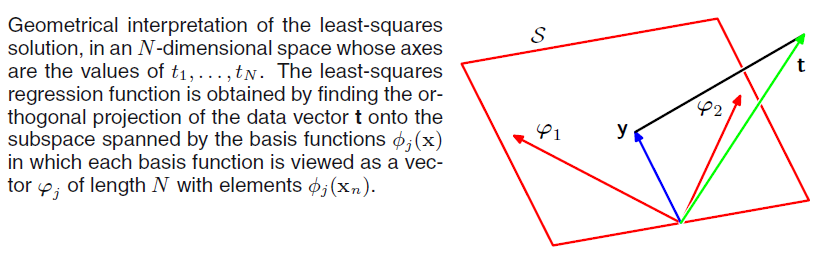



### 3.1.3 Sequential learning

前面的解中，如果数据量有变化，需要重新求解矩阵的乘积和逆，这并不是一个很好的解决方案。因此需要**序列化的算法** 或者称为**在线学习(on-line algorithm)**. 

在实际的算法中， 一般采用 stochastic gradient descent技术对参数 $\mathbf{w}$进行求解。假设误差函数表示维 $E = \sum_n E_n$

那么梯度下降表示为： 
$$
\mathbf{w}^{\left(\tau+1\right)}= \mathbf{w}^{\left(\tau\right)}-\eta \triangledown E_n
$$

在我们的基函数回归的问题中表示为：
$$
\mathbf{w}^{\left(\tau+1\right)}= \mathbf{w}^{\left(\tau\right)}+\eta\left(t_n - \mathbf{w}^{\left(\tau\right)T}\mathbf{\phi_n}\right)\mathbf{\phi_n }
$$
其中 $\mathbf{\phi_n}= \mathbf{\phi}\left(\mathbf{x_n}\right)$， 表示第$n$个数据来临时计算得到的基函数得到的"**特征向量**"。 这个算法被称为least-mean-squares  或者**LMS** 算法。

### 3.1.4 Regularized least squares

在前面的介绍中，我们曾提到过正则化项的概念，也就是说我们在最小化误差的后面添加了一个正则化项
$$
E_D\left(\mathbf{w}\right) +\lambda E_W\left(\mathbf{w}\right)
$$
其中$\lambda$表示正则化项参数，控制着基于数据的误差项和正则化项之间的相对重要性。其中比较简单的正则化项可以表示为二次正则化项：
$$
E_W\left(\mathbf{w}\right)= \frac{1}{2}\mathbf{w}^T\mathbf{w}
$$

那么现在的总误差函数表示为：
$$
\frac{1}{2}\sum_{n=1}^N \left[t_n- \mathbf{w}^T\mathbf{\phi\left(x_n\right)}\right]^2+ \frac{\lambda}{2}\mathbf{w}^T\mathbf{w}
$$

正则化项的选取是机器学习的一门艺术，因为在序列化学习中，我们一般要求正则化项要趋于0，除非得到数据的支撑。

带有正则化项的回归结果表示为：
$$
\mathbf{w}= \left(\lambda \mathbf{I+ \Phi^T\Phi}\right)^{-1}\mathbf{\Phi^Tt}
$$
带有一般的正则化项的误差函数表示为：
$$
\frac{1}{2}\sum_{n=1}^N \left[t_n- \mathbf{w}^T\mathbf{\phi\left(x_n\right)}\right]^2+ \frac{\lambda}{2}\sum_{j=1}^M |w_j|^q
$$
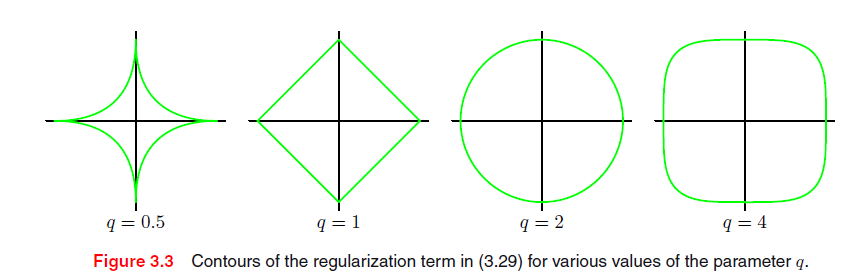



** Lasso**
    当前面的正则化项中$q=1$时，我们称之为lasso（数据科学中）,当正则化项的参数$\lambda$非常大的时候，会使得正则化项的某些数$w_j$为0，也就是称为稀疏模型 （sparse model）. 带有正则化项的优化问题可以转换为带有约束条件的没有正则化优化问题，也即正则化项可以放在约束条件里面：(拉格朗日优化)
    
$$
\sum_{j=1}^M|w_j|^q\leqslant \eta
$$
用图表示为
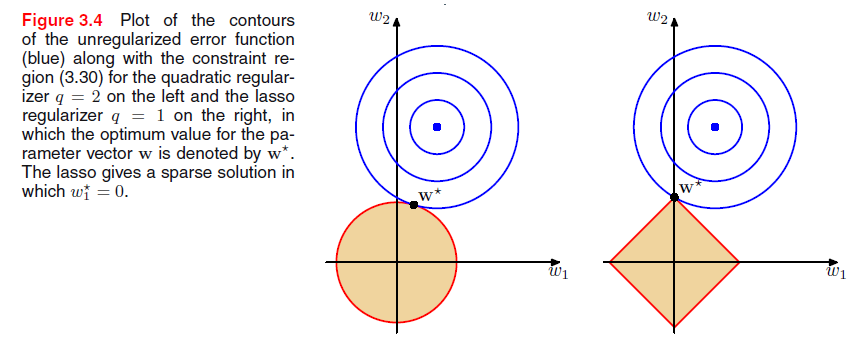

已有文献证明，当我们的正则化项的系数 $\lambda$增大时，模型的稀疏程度越高，也就是越来越多的参数 $w_j$变成0； 

正则化项的存在，使我们可以采用很复杂的模型去训练数据而避免过拟合。但是问题又缓缓道$\lambda$的确定问题上。

### 3.1.5 Multiple outputs

多输出问题，也就是说如果原始的目标变量是一个向量，那么这个问题可以转化为多个相互独立的回归问题。
$$
y\left(\mathbf{x,w}\right) = \mathbf{W}^T\phi\left(x\right)
$$
其中 $\mathbf{y}$是一个K维向量，$\mathbf{W}$是一个$M\times K$ 矩阵，

得到结果
$$
\mathbf{W}_{ML} = \left(\mathbf{\Phi^T\Phi}\right)^{-1}\mathbf{\Phi}^T\mathbf{T}
$$